# Compute Fourier Series Coefficients
## Consider various signals
## Coeffs computed by numerical integration 

In [1]:
from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
    !wget -O basic_material.py https://raw.githubusercontent.com/JonHowMIT/Signals_and_Systems/main/basic_material.py
%run basic_material

import scipy.integrate
from scipy import signal

Running Python: 3.8.17
Running Sympy: 1.12rc1


In [2]:
KK = 8 # discrete plotting range
Krange = np.arange(-KK,KK+1,1)

## Plotting Functions

In [62]:
def compute_ck(T0,xftn):
    omega0 = 2*np.pi/T0
    tt = np.arange(0, T0, 1/10000)  # very fine time samples to compute cts signal
    x2 = lambda t,k: np.exp(-1j * k * omega0 * t) # exp
    prod = lambda t,k: xftn(t) * x2(t,k)/T0

    Cvalues = np.zeros((2*KK+1,1),dtype = 'complex_')
    for kk in Krange:
        Cvalues[KK+kk] = scipy.integrate.simps(prod(tt,kk), tt) # see page 7 of topic 6

    return Cvalues

def plot_fourier_coeffs(T0,x,Cvals):
    plot_tt = np.arange(-3*T0, 3*T0, 1/100)  # the time samples
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,5), dpi=300)
    ax1.plot(plot_tt, x(plot_tt), 'k-', lw=2)
    ax1.set_title('Function')
    ax1.set_ylabel('$x(t)$')
    ax1.set_xlabel('$t$')
    nicegrid(ax1)
    
    markerline, stemlines, baseline = ax2.stem(Krange, np.abs(Cvals), 'b-', use_line_collection=True)
    plt.setp(stemlines, 'linewidth', 3)
    ax2.set_xlabel('k')
    ax2.set_xticks(np.arange(-KK+1,KK,2))
    ax2.set_title('Fourier Coefficients')
    ax2.set_ylabel('$|c_k|$')
    ax2.set_ylim(0,1.1)
    plt.tight_layout()
    nicegrid(ax2)
    plt.show()

## Cosine

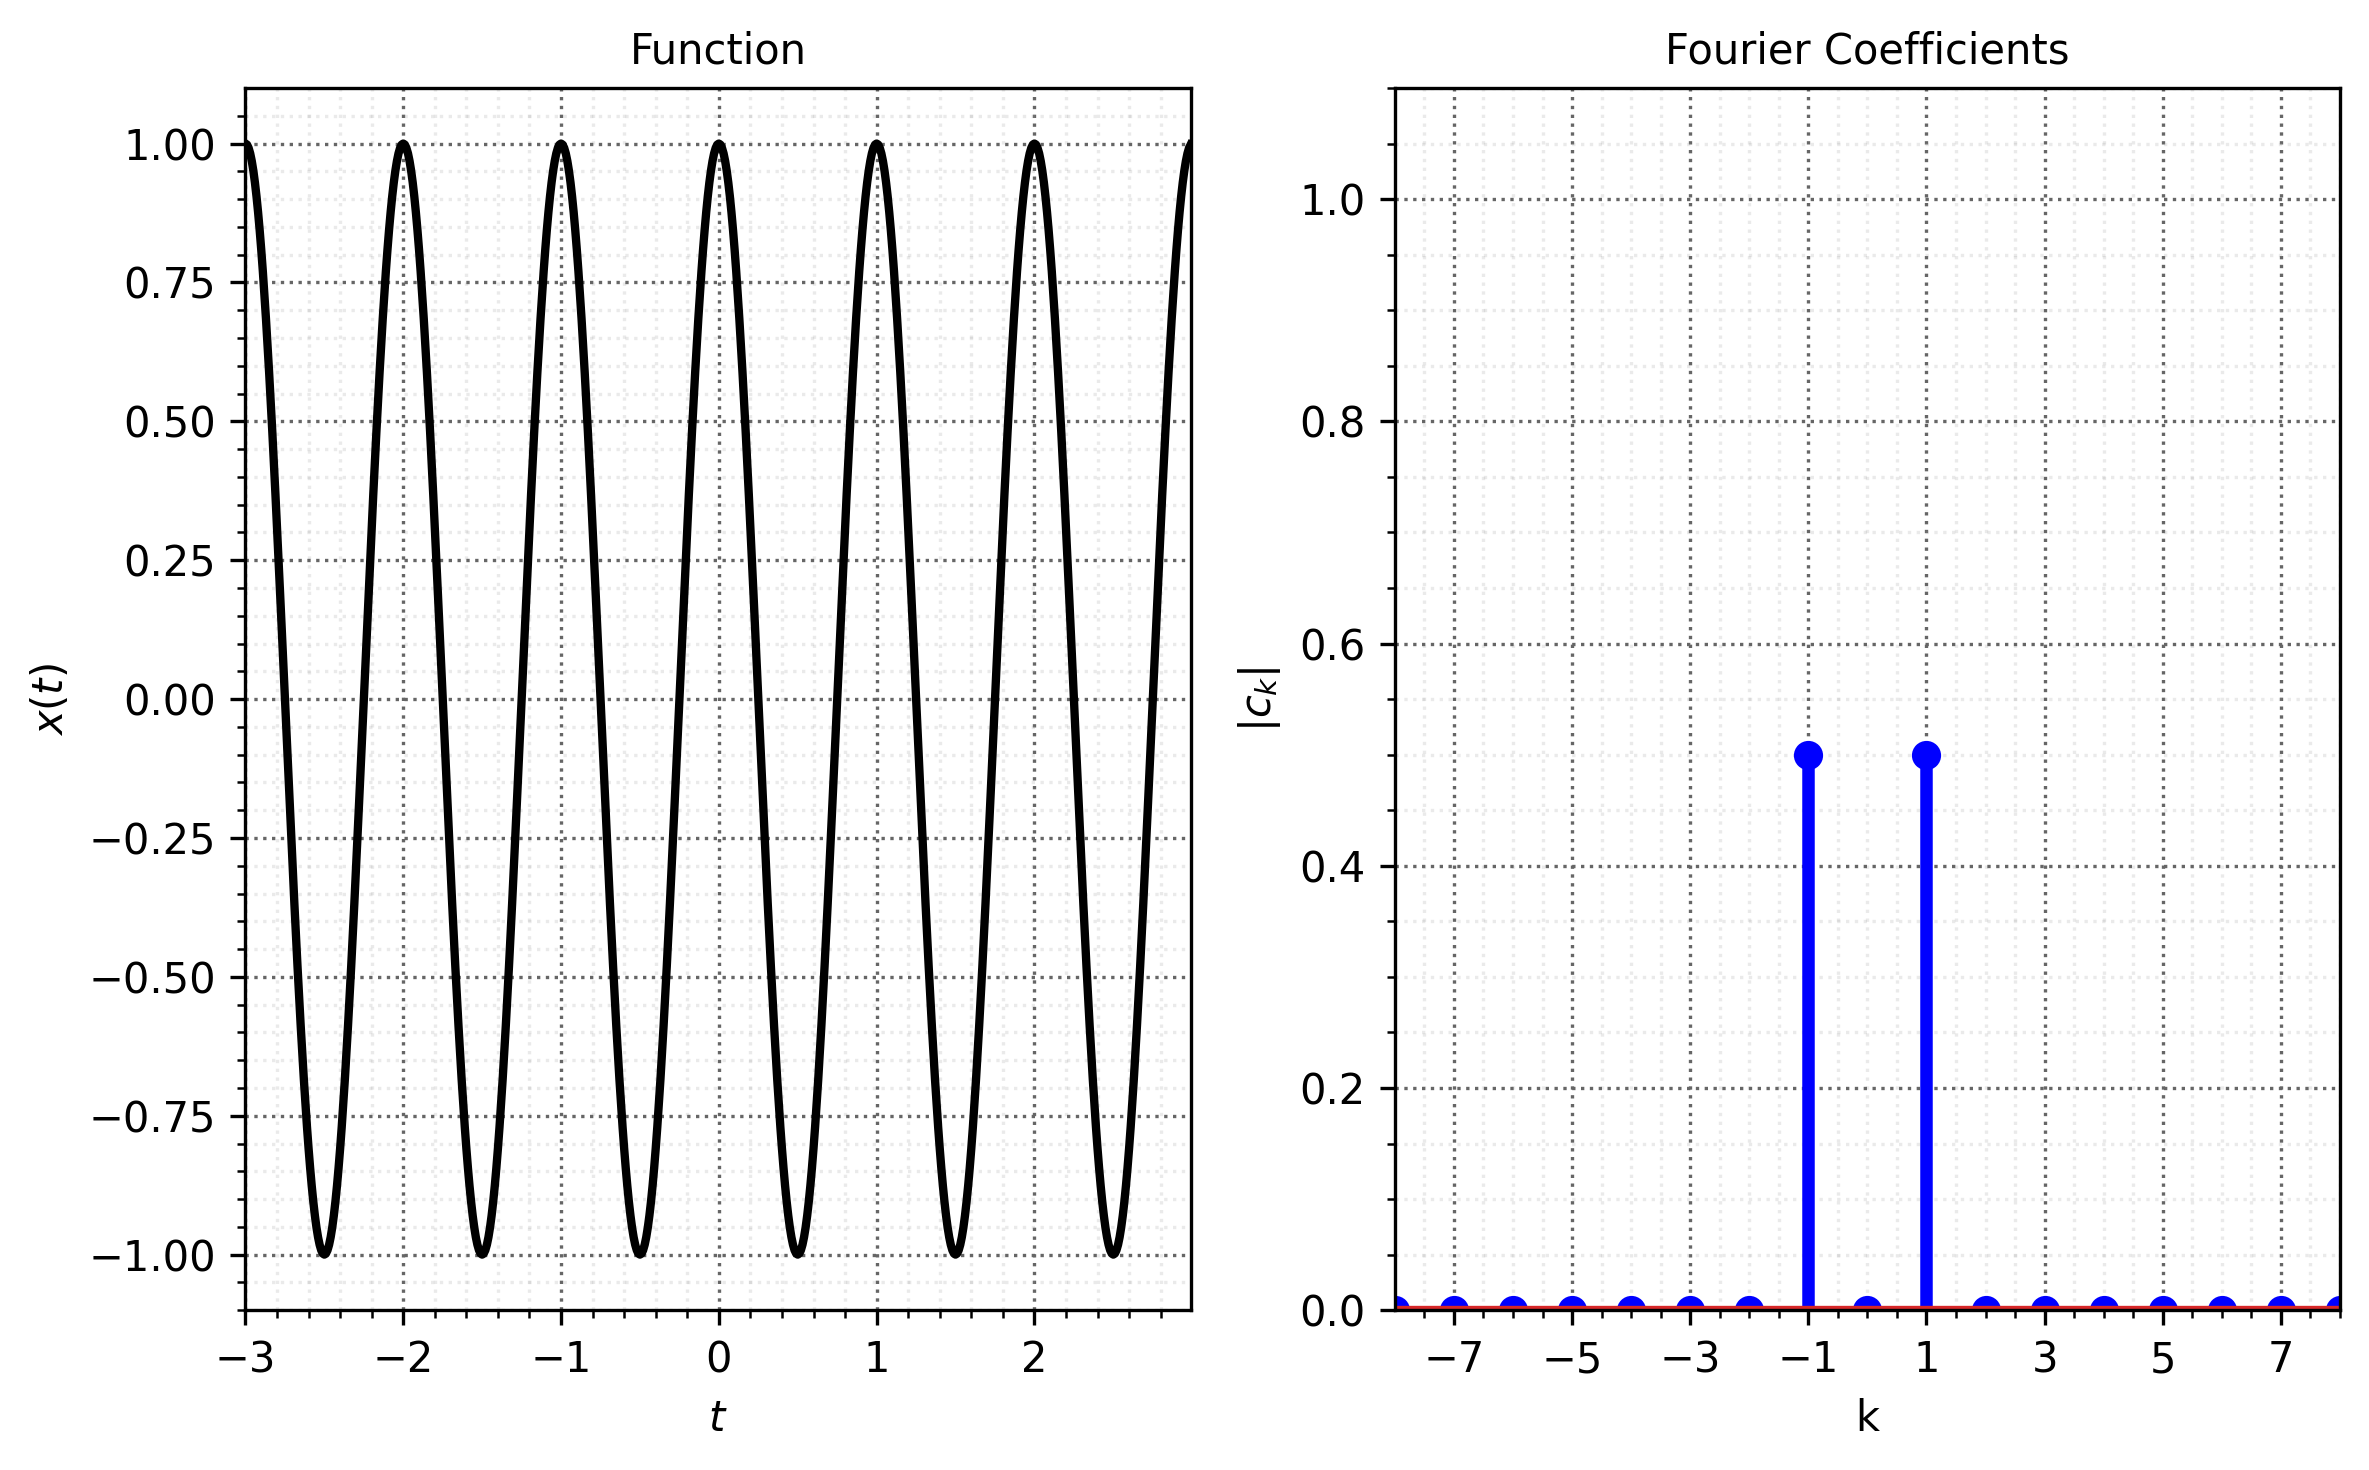

In [63]:
T0 = 1
x1 = lambda t: np.cos(2*np.pi*t/T0)  
C_ex1 = compute_ck(T0,x1)
plot_fourier_coeffs(T0,x1,C_ex1)

## Sine

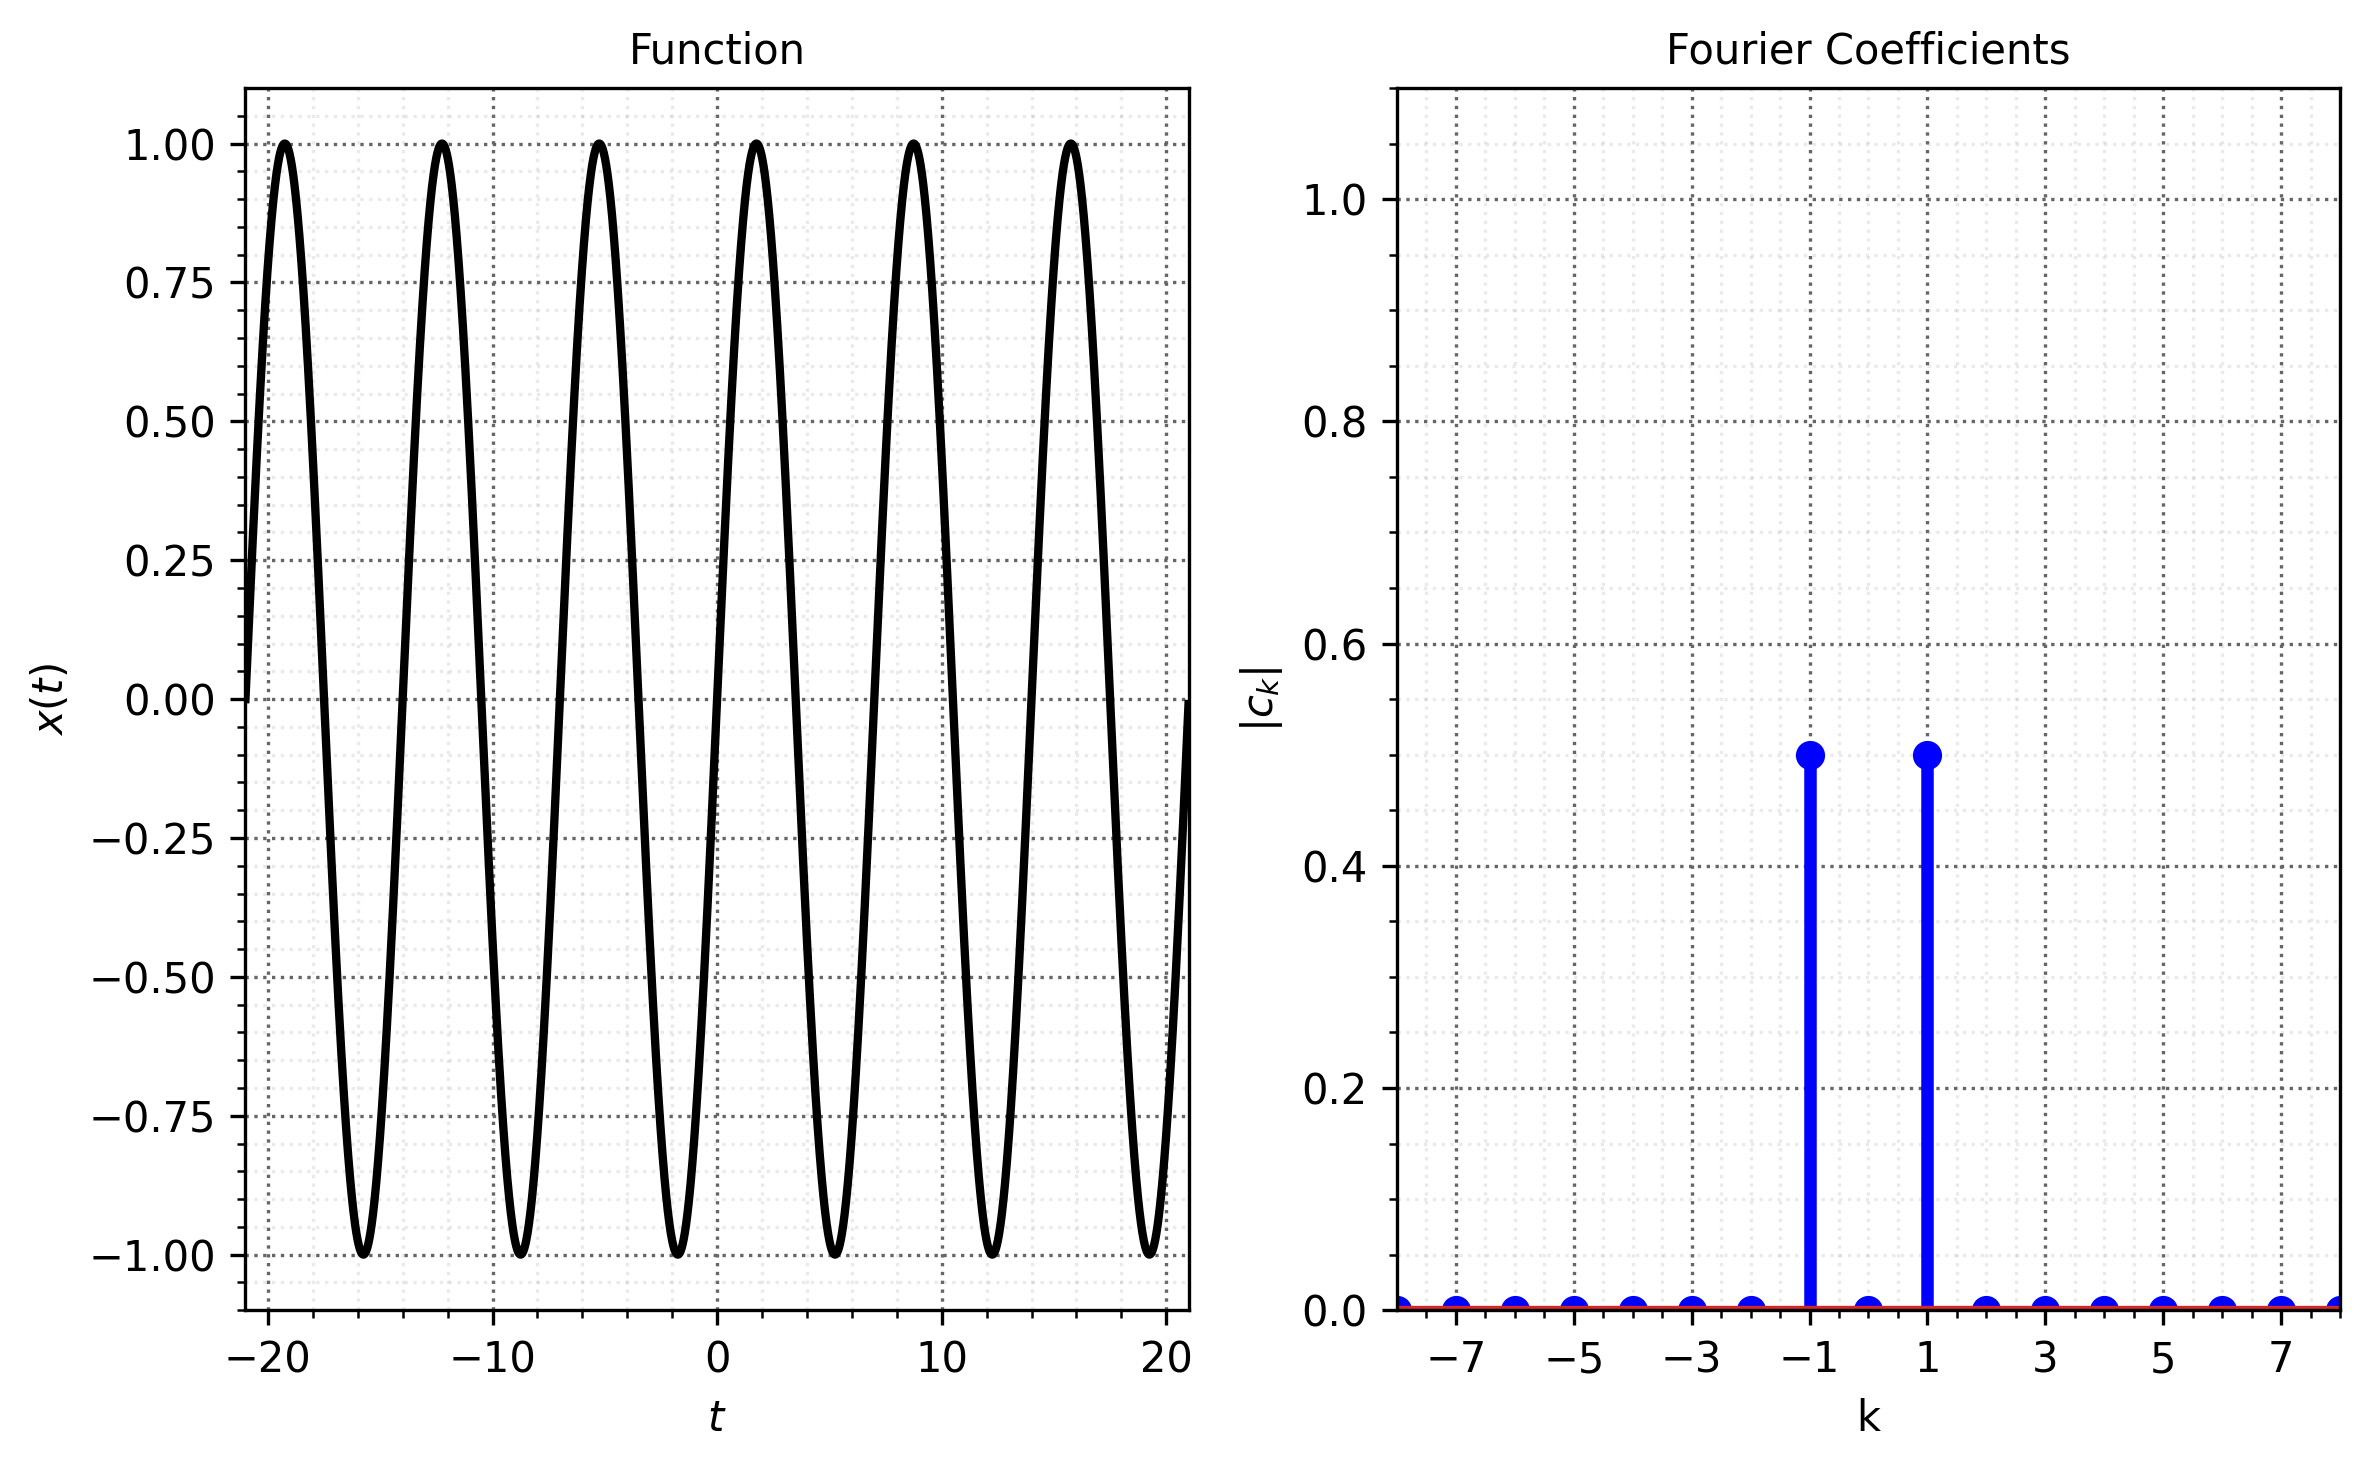

In [64]:
T0 = 7
x2 = lambda t: np.sin(2*np.pi*t/T0)  
C_ex2 = compute_ck(T0,x2)
plot_fourier_coeffs(T0,x2,C_ex2)

## Multiple Cosines

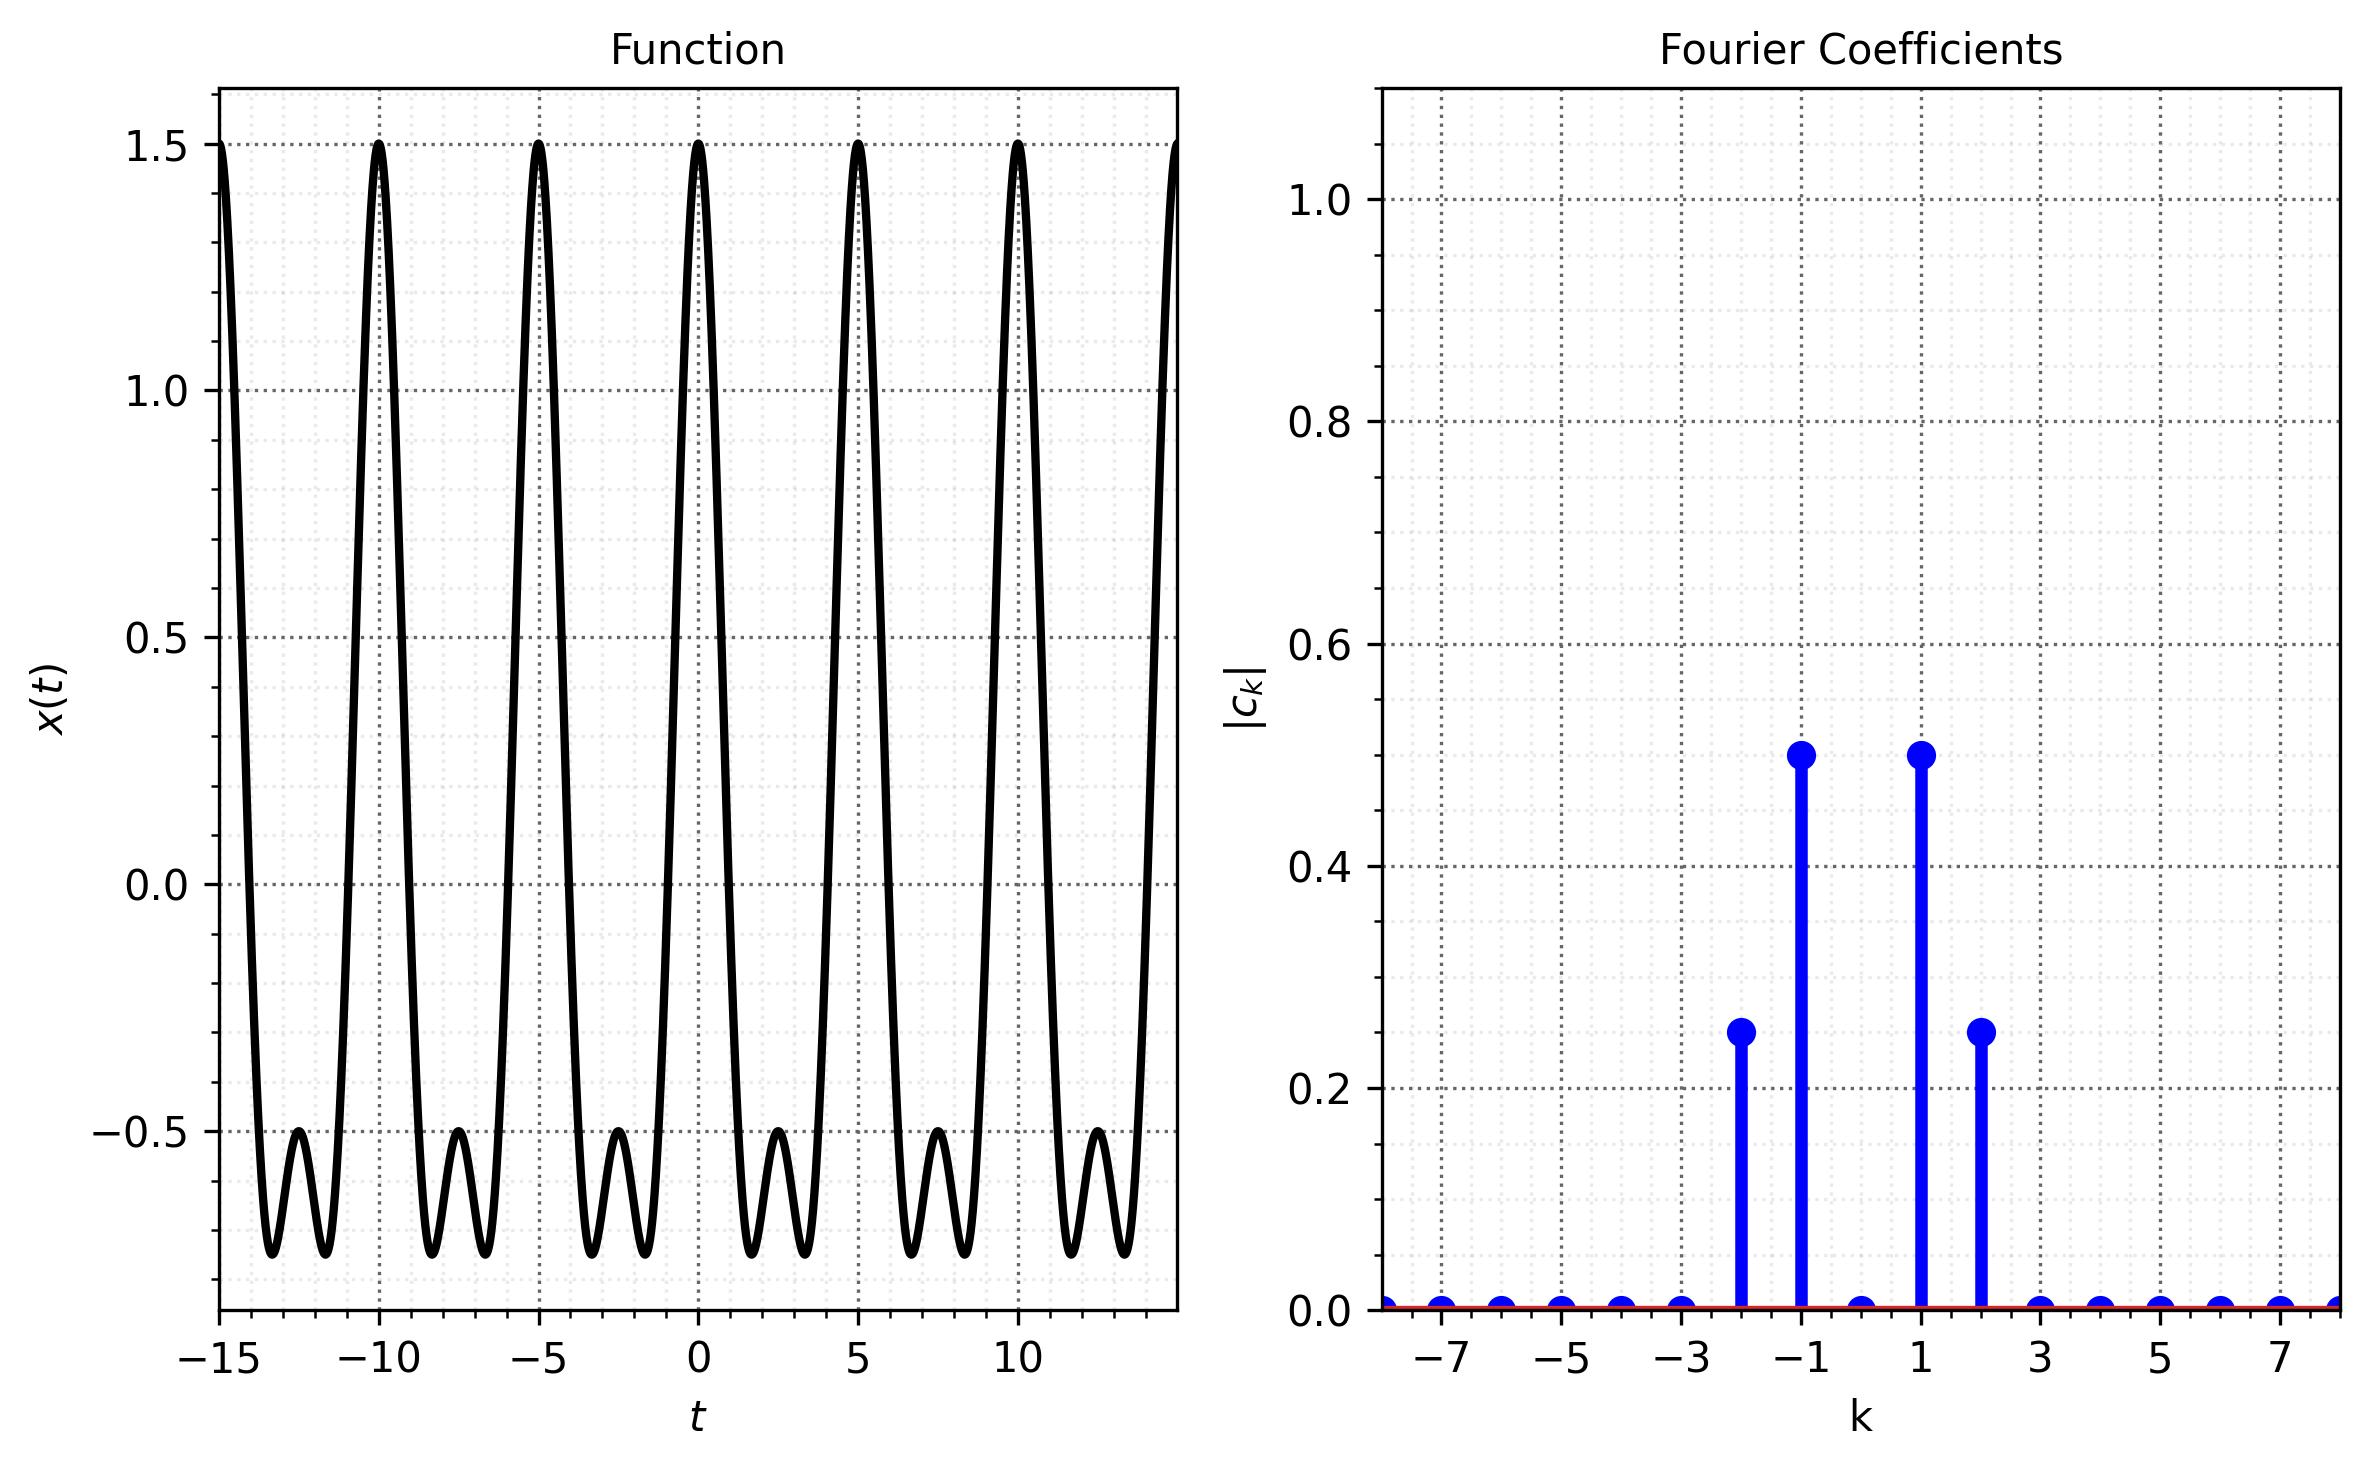

In [65]:
T0 = 5
x3 = lambda t: np.cos(2*np.pi*t/T0) + 0.5*np.cos(4*np.pi*t/T0)  
C_ex3 = compute_ck(T0,x3)
plot_fourier_coeffs(T0,x3,C_ex3)

## Square Wave

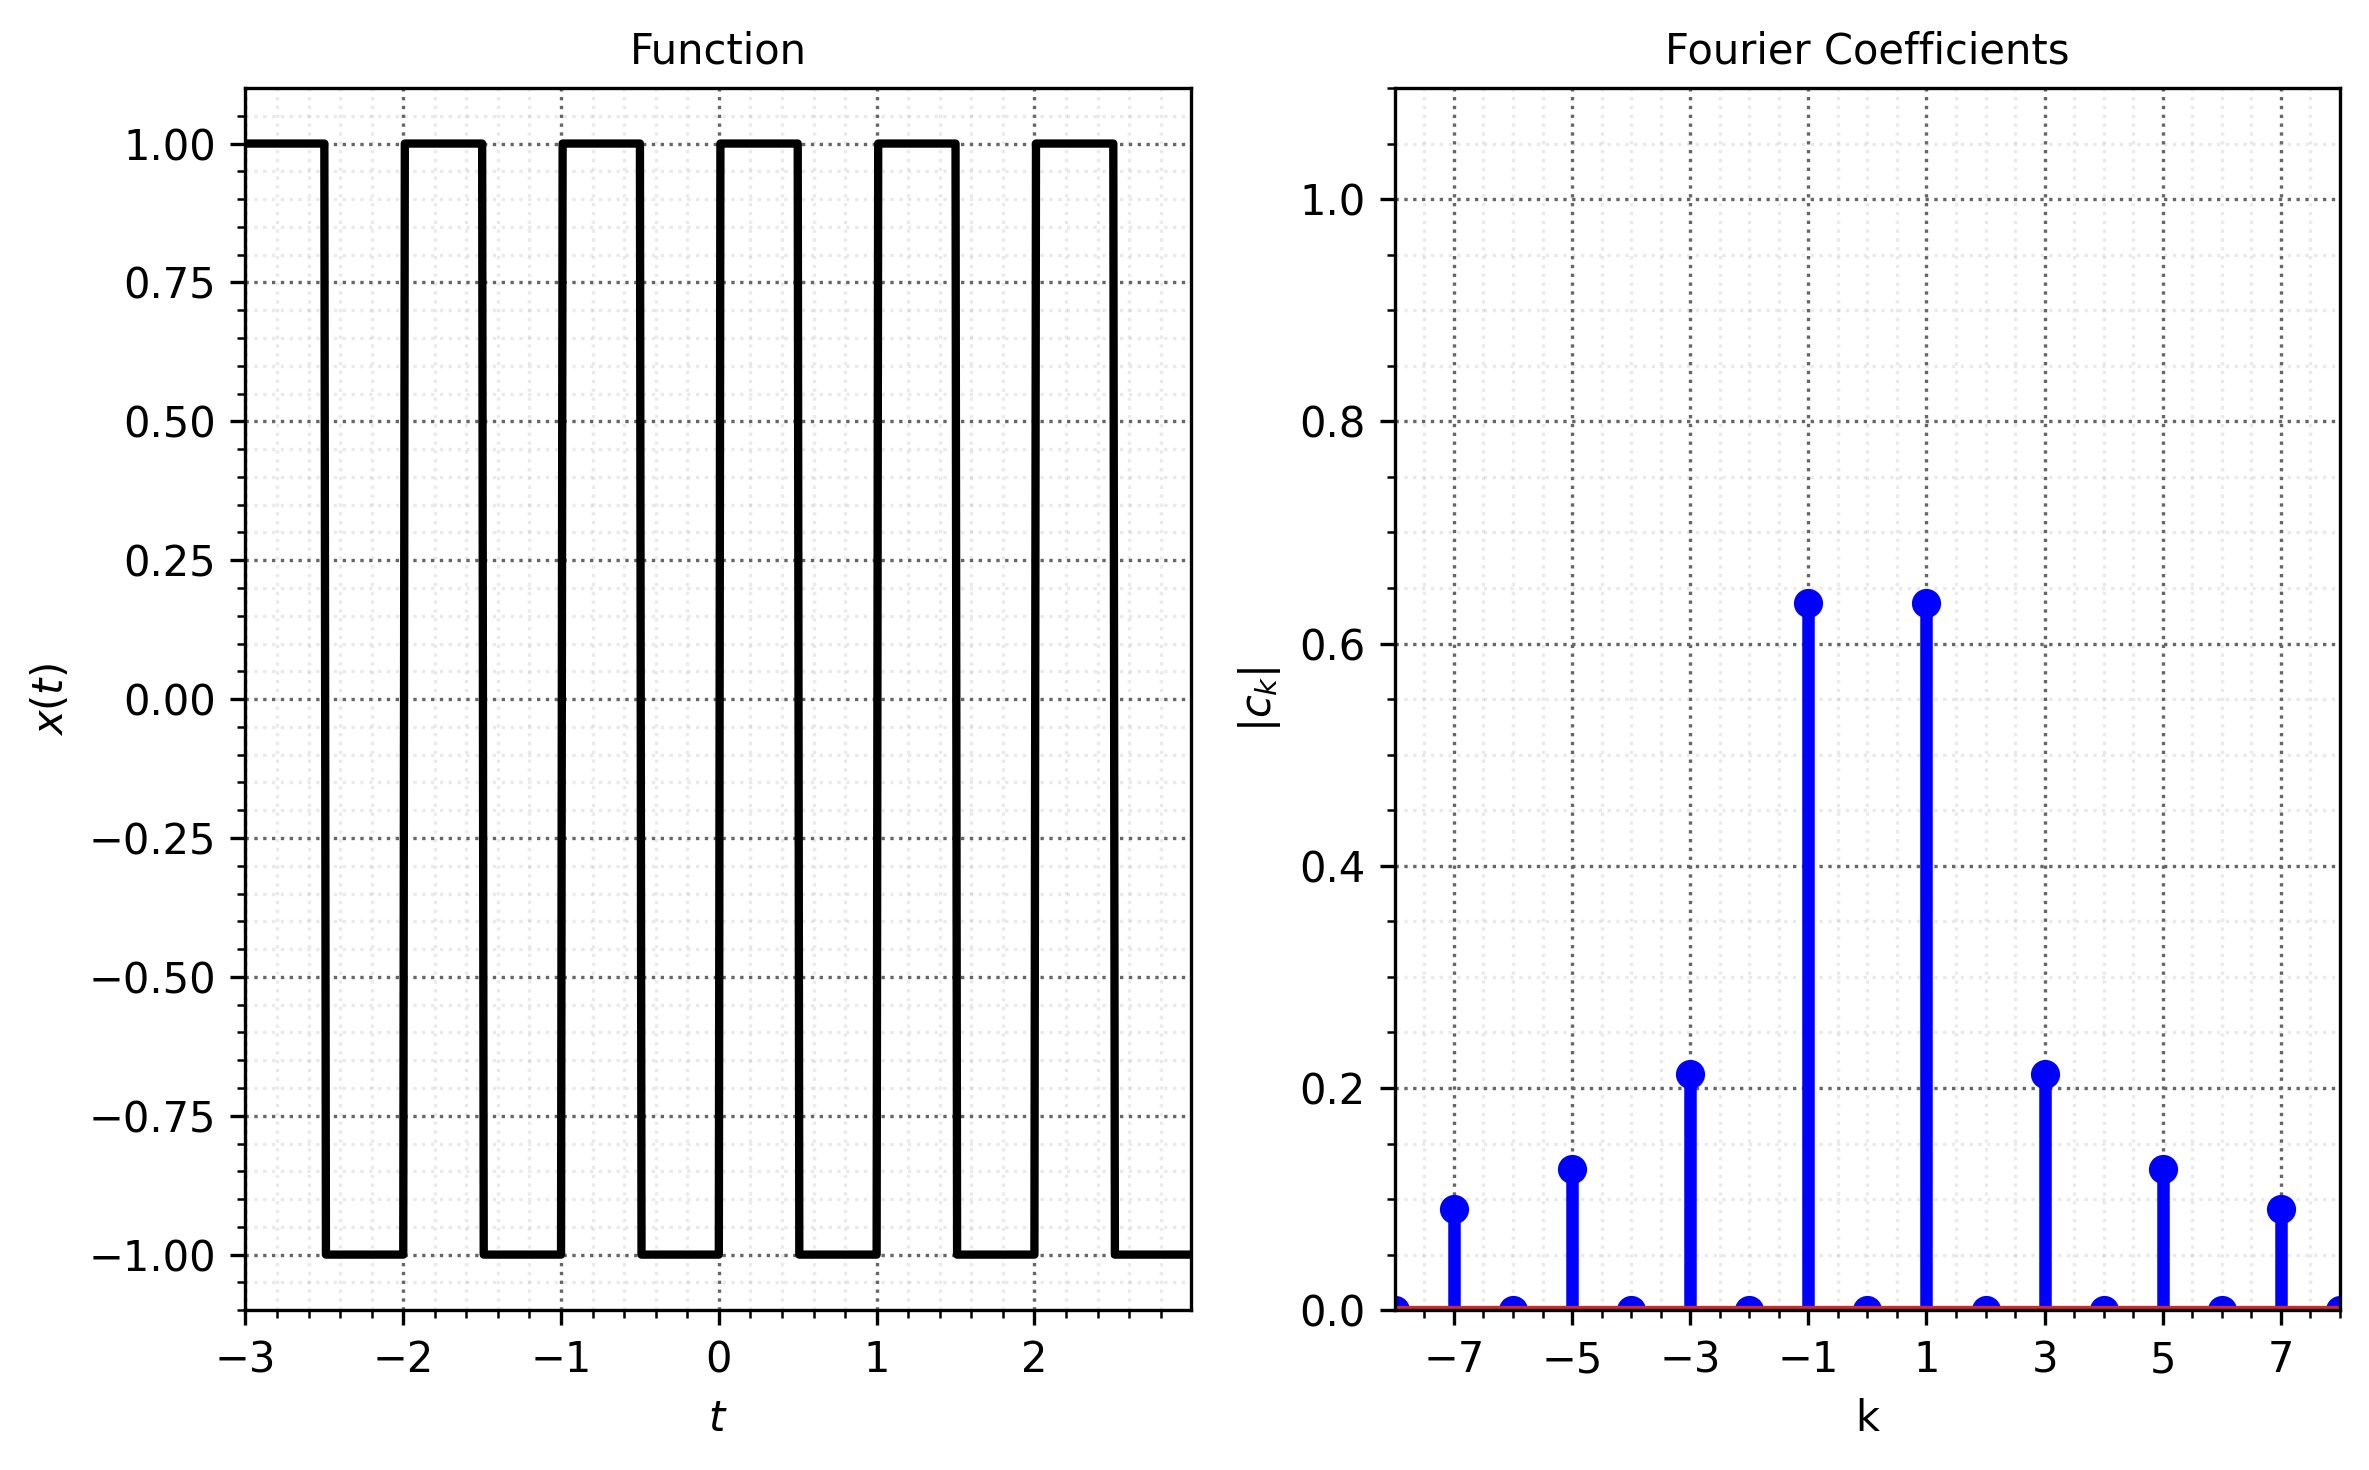

In [66]:
T0 = 1
x4 = lambda t: signal.square(2 * np.pi * t/ T0)  
C_ex4 = compute_ck(T0,x4)
plot_fourier_coeffs(T0,x4,C_ex4)

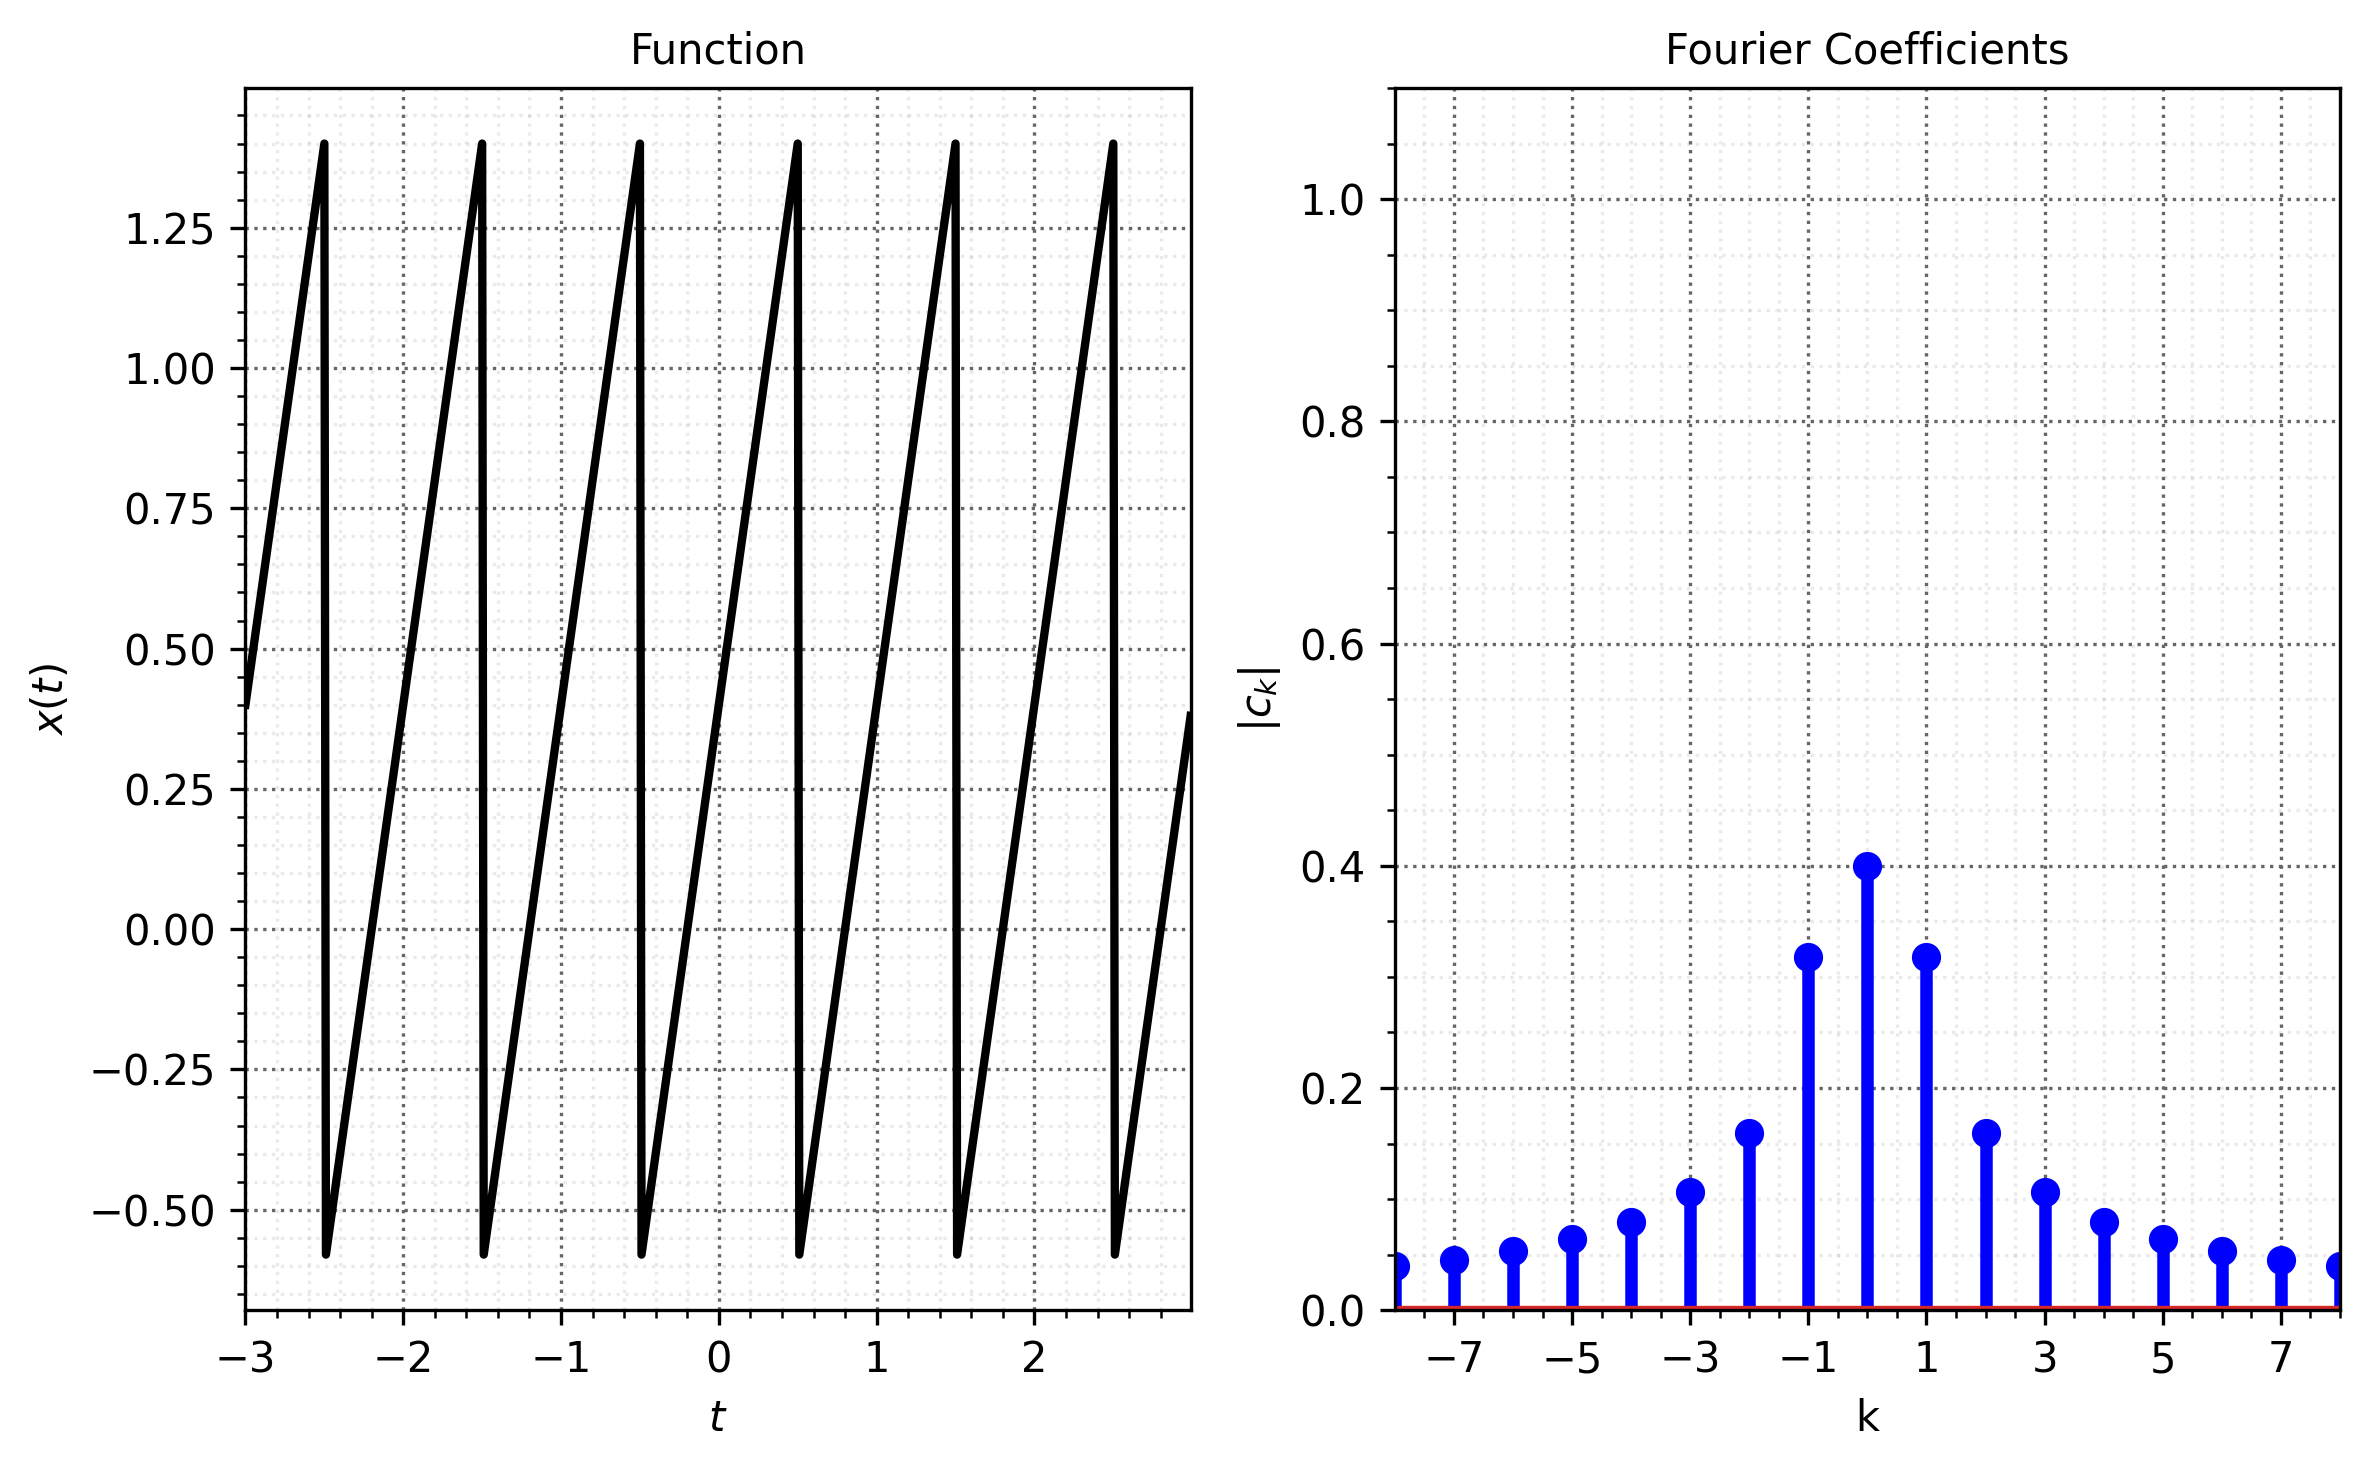

In [68]:
T0 = 1
x5 = lambda t: 0.4+signal.sawtooth(2 * np.pi * t/ T0 + np.pi)  
C_ex5 = compute_ck(T0,x5)
plot_fourier_coeffs(T0,x5,C_ex5)